<a href="https://colab.research.google.com/github/Bishara1905/Lung-cancer-prediction-using-KNN/blob/main/Realistic_ocean_climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Location            500 non-null    object 
 2   Latitude            500 non-null    float64
 3   Longitude           500 non-null    float64
 4   SST (°C)            500 non-null    float64
 5   pH Level            500 non-null    float64
 6   Bleaching Severity  350 non-null    object 
 7   Species Observed    500 non-null    int64  
 8   Marine Heatwave     500 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 31.9+ KB
Classification Report:
               precision    recall  f1-score   support

        High       0.33      0.12      0.18        16
         Low       0.28      0.22      0.25        32
      Medium       0.35      0.32      0.33        28
         nan       0.26      0.46      0.33 

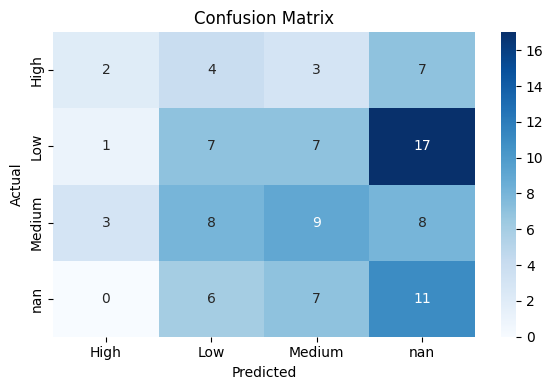

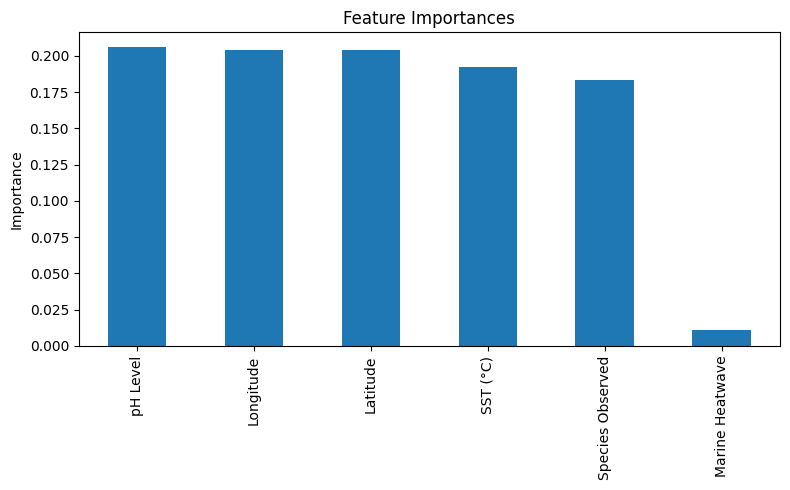

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df=pd.read_csv("/content/realistic_ocean_climate_dataset.csv")
df
df.head()
df.info()
df.describe()
df.isna().sum()
le = LabelEncoder()
df['Bleaching Severity'] = le.fit_transform(df['Bleaching Severity'])
df= df.drop(['Date', 'Location'], axis=1)
X = df.drop('Bleaching Severity', axis=1)
y = df['Bleaching Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
feat_imp.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()








